## **World Endurance Championship 2012-2023 + Le Mans 2011 Analysis Walktrough**

##### In this notebook, we will analyse different aspects of the [FIA WEC season from 2012-2023 and Le Mans 2011 Race](https://www.kaggle.com/datasets/feliperoll/fia-wec-2012-2023-le-mans-2011) as a bonus.
##### A few changes were made to the original database:

* [Preparing the Dataset and Data Cleaning](#Preparing-the-Dataset-and-Data-Cleaning)
    * [Importing packages](#Importing-all-necessary-packages)
    * [Importing data](#Importing-the-data)
    * [Observing our data](#Observing-our-data)
    * [Renaming values](#Renaming-a-few-values)
    * [Dropping Columns](#Dropping-a-few-columns-we-won't-use)
    * [Filling missing values](#Filling-missing-values)
    * [Saving the dataset](#Saving-the-cleaned-file-as-a-new-dataset)
* [Exploratory Analysis on Tyre Manufacturers](#Now-that-we-don't-have-missing-values,-let's-make-some-analysis-on-the-tyre-manufacturers)
    * [2017 Season - LMGTE](#Let's-take-a-look-at-the-performance-of-Michelin-and-Dunlop-in-2017-for-both-LMGTE-classes)
    * [2018-2019 Season - LMP2](#Let's-take-a-look-at-the-number-of-race-wins-of-Michelin-and-Dunlop-in-2018-2019-for-the-LMP2-class)
    * [Tyre Manufacturer analysis](####Here-we-gather-the-total-number-of-times-each-tyre-manufacturer-participated-in-a-class-on-all-seasons)
* [Exploratory analysis on car performances](#Comparing-data-between-cars)
***


#### **Preparing the Dataset and Data Cleaning**

##### **Importing all necessary packages**

In [1226]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

##### **Importing the data**

In [1227]:
#loading the data from wec_data.csv
wec_analysis = pd.read_csv('C:\Data Science\Projetos\wec-analysis\Datasets\wec_data.csv', sep=',')

##### **Observing our data**



In [1228]:
#taking a look at the database
wec_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   group             428 non-null    object 
 7   race              3035 non-null   object 
 8   event_duration    3035 non-null   int64  
 9   season            3035 non-null   object 
 10  laps              3035 non-null   int64  
 11  total_time        3026 non-null   object 
 12  gap_first         2948 non-null   object 
 13  gap_car_ahead     2946 non-null   object 
 14  tyres             3035 non-null   object 
 15  status            3035 non-null   object 
 16  fl_lap_number     3022 non-null   float64


In [1229]:
#taking a look at the database
wec_analysis.sample(3)

,car,overall_position,class_position,team,vehicle,class,group,race,event_duration,season,...,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average,driver_1,driver_2,driver_3
2072,Porsche GT Team #91,19,5,Porsche GT Team,Porsche 911 RSR - 19,LMGTE Pro,NaN,Monza,6,2022,...,14 Laps,1 Laps,Michelin,Classified,5.0,1:46.957,195.0,Gianmaria BRUNI,Frédéric MAKOWIECKI,NaN
1274,Toyota Gazoo Racing #8,1,1,Toyota Gazoo Racing,Toyota TS050 - Hybrid,LMP1,H,LeMans 2,24,2018-2019,...,NaN,NaN,Michelin,Classified,4.0,3:18.397,247.2,Sébastien BUEMI,Kazuki NAKAJIMA,Fernando ALONSO
2349,Team WRT #41,13,3,Team WRT,Oreca 07 - Gibson,LMP2,NaN,Monza,6,2023,...,8 Laps,5.757,Goodyear,Classified,151.0,1:40.957,206.6,Rui ANDRADE,Robert KUBICA,Louis DELÉTRAZ


In [1230]:
#using ydata profiling for another more in depth visualization
#profile = ProfileReport(wec_analysis, title="Wec Analysis")
#profile.to_file("wec-analysis.html")

##### **Renaming a few values**

In [1231]:
# Mapping for renaming classes
class_mapping = {
    'LM P1': 'LMP1',
    'LM P2': 'LMP2',
    'LM GTE Pro': 'LMGTE Pro',
    'LM GTE Am': 'LMGTE Am'
}

# Renaming classes
wec_analysis['class'] = wec_analysis['class'].replace(class_mapping)
unique_classes_2012 = wec_analysis[wec_analysis['season'] == '2012']['class'].unique()
unique_classes_2012

array(['LMP1', 'LMP2', 'LMGTE Pro', 'LMGTE Am', 'CDNT'], dtype=object)

##### **Dropping a few columns we won't use**

In [1232]:
#displaying the unique values in the 'group' column 
wec_analysis['group'].unique()

array(['H', 'L', nan, 'P/A'], dtype=object)

In [1233]:
#dropping the columns driver_1, driver_2, and driver_3 abd group
wec_analysis.drop(['driver_1', 'driver_2', 'driver_3','group'], axis=1, inplace=True)

##### **Taking a look at the missing values and fixing them**

In [1234]:
#displaying rows with missing values in the 'gap_first' column in the wec_analysis DataFrame
missing_gap_first = wec_analysis[wec_analysis['gap_first'].isnull()]
missing_gap_first.sample(3)

,car,overall_position,class_position,team,vehicle,class,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average
971,Porsche LMP Team #2,1,1,Porsche LMP Team,Porsche 919 Hybrid,LMP1,Nurburgring,6,2017,204,6:00:09.607,NaN,NaN,Michelin,Classified,6.0,1:40.882,183.3
245,Audi Sport Team Joest #7,1,1,Audi Sport Team Joest,Audi R18 e-tron quattro,LMP1,Silverstone,6,2015,201,6:00:30.876,NaN,NaN,Michelin,Classified,26.0,1:40.836,210.7
1214,Toyota Gazoo Racing #8,1,1,Toyota Gazoo Racing,Toyota TS050 - Hybrid,LMP1,LeMans,24,2018-2019,388,24:00:52.247,NaN,NaN,Michelin,Classified,5.0,3:17.658,248.2


In [1235]:
#gap_first and gap_car_ahead are null because the car is in first position, let's fix that
#filling missing values in 'gap_first' and 'gap_car_ahead' columns with 0
wec_analysis['gap_first'].fillna(0, inplace=True)
wec_analysis['gap_car_ahead'].fillna(0, inplace=True)

In [1236]:
#displaying rows with missing values in the 'total_time' column 
missing_total_time = wec_analysis[wec_analysis['total_time'].isnull()]
missing_total_time.sample(3)

,car,overall_position,class_position,team,vehicle,class,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average
2771,Luxury Racing #58,28,7,Luxury Racing,Ferrari F458 Italia,LMGTE Am,Sebring,12,2012,0,NaN,325 Laps,83 Laps,Michelin,Not classified,NaN,NaN,NaN
243,KCMG #47,26,7,KCMG,Oreca 03R - Nissan,LMP2,Shanghai,6,2014,0,NaN,188 Laps,123 Laps,Dunlop,Not classified,NaN,NaN,NaN
803,Manor #45,31,10,Manor,Oreca 05 - Nissan,LMP2,Shanghai,6,2016,0,NaN,195 Laps,1 Laps,Dunlop,Not classified,NaN,NaN,NaN


##### **Filling missing values**

In [1237]:
#total_time, fl_lap_number,fl_time,fl_kph_average is null because some cars did not classify, did not start or retired from race, let's fix that
#filling missing values in 'total_time', 'fl_lap_number', 'fl_time', and 'fl_kph_average' columns with 0 
wec_analysis['total_time'].fillna(0, inplace=True)
wec_analysis['fl_lap_number'].fillna(0, inplace=True)
wec_analysis['fl_time'].fillna(0, inplace=True)
wec_analysis['fl_kph_average'].fillna(0, inplace=True)

In [1238]:
#taking a look at the updated database
wec_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   race              3035 non-null   object 
 7   event_duration    3035 non-null   int64  
 8   season            3035 non-null   object 
 9   laps              3035 non-null   int64  
 10  total_time        3035 non-null   object 
 11  gap_first         3035 non-null   object 
 12  gap_car_ahead     3035 non-null   object 
 13  tyres             3035 non-null   object 
 14  status            3035 non-null   object 
 15  fl_lap_number     3035 non-null   float64
 16  fl_time           3035 non-null   object 


##### **Saving the cleaned file as a new dataset**

In [1239]:
# Save the wec_analysis DataFrame to a CSV file
wec_analysis.to_csv('C:\Data Science\\Projetos\\wec-analysis\\Notebooks\\wec_data_clean.csv', index=False)

#### **Now that we don't have missing values, let's make some analysis on the tyre manufacturers**

##### **Let's take a look at the performance of Michelin and Dunlop in 2017 for both LMGTE classes**

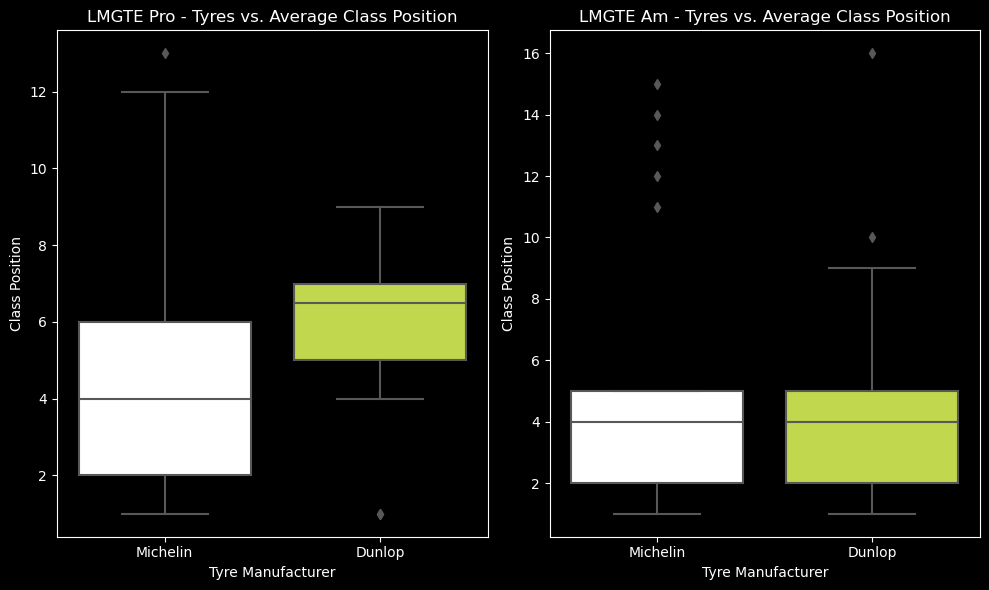

In [1240]:
#average class position for the classes LMGTE Pro and LMGTE Am in the 2017 season with cars using either Dunlop or Michelin
wec_analysis_2017_season = wec_analysis[(wec_analysis['season'] == '2017') & (wec_analysis['class'].isin(['LMGTE Pro', 'LMGTE Am']))]

if not wec_analysis_2017_season.empty:
    plt.figure(figsize=(10, 6))
    plt.style.use('dark_background') 
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='tyres', y='class_position', data=wec_analysis_2017_season[wec_analysis_2017_season['class'] == 'LMGTE Pro'], palette=['white', '#CFEE37'])
    plt.title('LMGTE Pro - Tyres vs. Average Class Position', loc='center')
    plt.xlabel('Tyre Manufacturer')
    plt.ylabel('Class Position')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='tyres', y='class_position', data=wec_analysis_2017_season[wec_analysis_2017_season['class'] == 'LMGTE Am'], palette=['white', '#CFEE37'])
    plt.title('LMGTE Am - Tyres vs. Average Class Position', loc='center')
    plt.xlabel('Tyre Manufacturer')
    plt.ylabel('Class Position')
    
    plt.tight_layout()
    plt.show()
else:
    print("No data points available for the season '2017' in LMGTE PRO and LMGTE AM classes.")


##### *We can see that in the Season 2017, Dunlop won only one race for the LMGTE Pro class while Michelin was vastly superior overall. In LMGTE Am, things were much closer, both tyre suppliers had a similiar season.*

##### **Let's take a look at the number of race wins of Michelin and Dunlop in 2018-2019 for the LMP2 class**

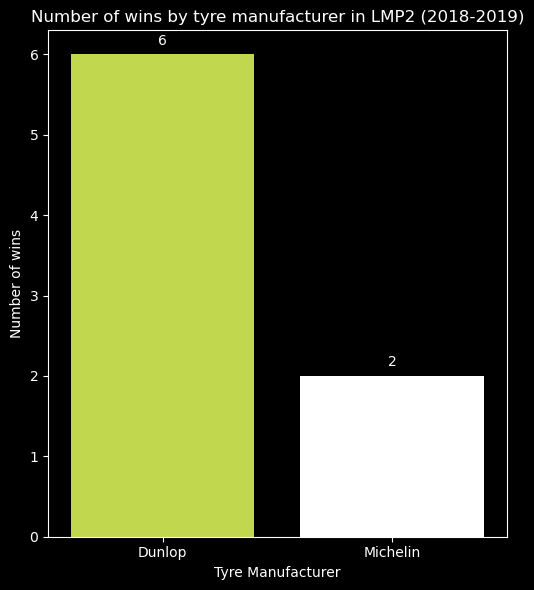

In [1241]:
#class wins for the LMP2 class in the 2018-2019 season with cars using either Dunlop or Michelin
wec_analysis_2018_2019_season = wec_analysis[(wec_analysis['season'].isin(['2018-2019'])) & (wec_analysis['class'] == 'LMP2') & (wec_analysis['class_position'] == 1)]

if not wec_analysis_2018_2019_season.empty:
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x='tyres', data=wec_analysis_2018_2019_season, palette=['#CFEE37', 'white'])
    plt.xlabel('Tyre Manufacturer')
    plt.ylabel('Number of wins')
    plt.title('Number of wins by tyre manufacturer in LMP2 (2018-2019)')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()
else:
    print("No data points available for the '2018-2019' season in LMP2 class with Class Position = 1.")

##### *We can see that in the Season 2018-2019, Dunlop won 6 races compared to Michelin's 2 in the LMP2 class*

##### **Here we gather the total number of times each tyre manufacturer participated in a class on all seasons**

In [1242]:
#number of races each tyre manufacturer participated in a season
manufacturer_race_count = wec_analysis.groupby(['season', 'tyres'])['race'].nunique()

print(manufacturer_race_count)

season     tyres   
2011       Dunlop      1
           Hankook     1
           Michelin    1
2012       Dunlop      8
           Michelin    8
           Pirelli     8
2013       Dunlop      8
           Michelin    8
2014       Dunlop      8
           Michelin    8
2015       Dunlop      8
           Michelin    8
2016       Dunlop      9
           Michelin    9
2017       Dunlop      9
           Michelin    9
2018-2019  Dunlop      8
           Michelin    8
2019-2020  Goodyear    7
           Michelin    7
2021       Goodyear    6
           Michelin    6
2022       Goodyear    6
           Michelin    6
2023       Goodyear    7
           Michelin    7
Name: race, dtype: int64


In [1243]:
#total number of classes each tyre manufacturer participated in a season
manufacturer_class_count = wec_analysis.groupby(['season', 'tyres'])['class'].nunique() * wec_analysis.groupby(['season', 'tyres'])['race'].nunique()

print(manufacturer_class_count)

season     tyres   
2011       Dunlop       4
           Hankook      1
           Michelin     4
2012       Dunlop      32
           Michelin    32
           Pirelli      8
2013       Dunlop      16
           Michelin    32
2014       Dunlop       8
           Michelin    40
2015       Dunlop      16
           Michelin    32
2016       Dunlop      36
           Michelin    45
2017       Dunlop      27
           Michelin    36
2018-2019  Dunlop       8
           Michelin    32
2019-2020  Goodyear     7
           Michelin    28
2021       Goodyear    12
           Michelin    18
2022       Goodyear     6
           Michelin    18
2023       Goodyear    14
           Michelin    14
dtype: int64


In [1244]:
#total number of classes each tyre manufacturer participated in every season
manufacturer_class_sum = manufacturer_class_count.groupby('tyres').sum()

print(manufacturer_class_sum)

tyres
Dunlop      147
Goodyear     39
Hankook       1
Michelin    331
Pirelli       8
dtype: int64


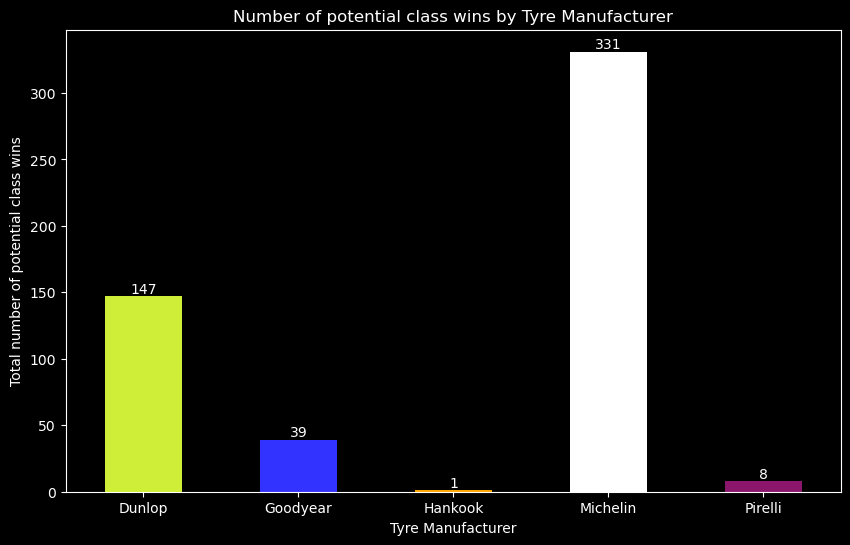

In [1245]:
#creating the plot to show in a visual way
plt.style.use('dark_background') 

colors = ['#CFEE37', '#3333FF', '#FFA500', '#FFFFFF', '#8B166C']  # Define colors for each bar

plt.figure(figsize=(10, 6))
manufacturer_class_sum.plot(kind='bar', color=colors)

for i, value in enumerate(manufacturer_class_sum):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Tyre Manufacturer')
plt.xticks(rotation=0)
plt.ylabel('Total number of potential class wins')
plt.title('Number of potential class wins by Tyre Manufacturer')
plt.show()

##### *This will give us an indicator of the number of potential class wins by each tyre manufacturer on all seasons combined*

##### **Now let's see the number of race wins of all classes and seasons for all tyre manufacturers**

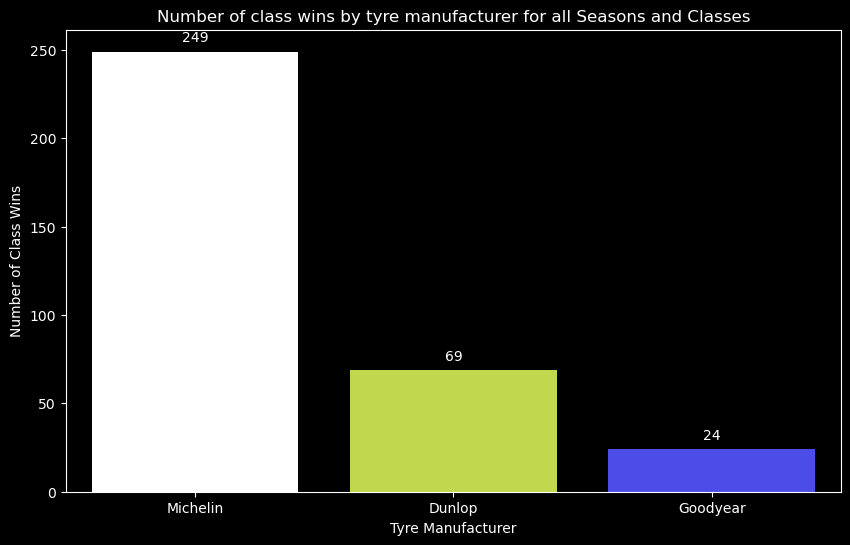

In [1246]:
#class wins for all classes in all seasons for all tyre manufacturers
wec_analysis_all_seasons_classes = wec_analysis[wec_analysis['class_position'] == 1]

if not wec_analysis_all_seasons_classes.empty:
    plt.figure(figsize=(10, 6))
    
    ax = sns.countplot(x='tyres', data=wec_analysis_all_seasons_classes, palette=['white','#CFEE37', '#3333FF'])
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.xlabel('Tyre Manufacturer')
    plt.ylabel('Number of Class Wins')
    plt.title('Number of class wins by tyre manufacturer for all Seasons and Classes')
    
    plt.show()
else:
    print("No data points available for Class Position = 1 across all seasons and classes.")

##### *We can see that Michelin is by far the most dominant tyre supplier with almost 250 class wins, followed by Dunlop and Goodyear. Pirelli and Hankook never won a race at the time of this analysis*

##### **Now we see the percentage of wins by each tyre manufacturer in all seasons and classes**

In [1247]:
class_position_1_by_manufacturer = wec_analysis[wec_analysis['class_position'] == 1]['tyres'].value_counts()

In [1248]:
percentage_of_wins = class_position_1_by_manufacturer/manufacturer_class_sum * 100
percentage_of_wins = percentage_of_wins.dropna()
percentage_of_wins

tyres
Dunlop      46.938776
Goodyear    61.538462
Michelin    75.226586
dtype: float64

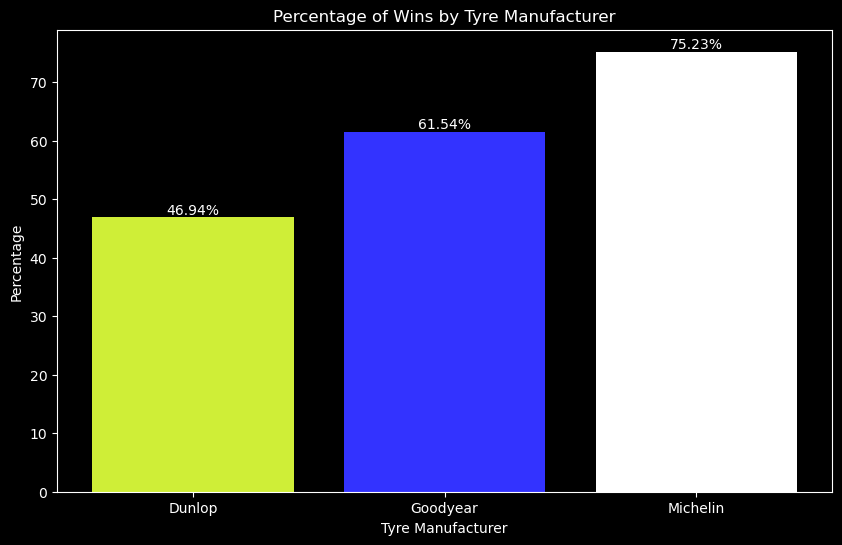

In [1249]:
#winrateby each tyre manufacturer in all seasons and classes

colors = ['#CFEE37', '#3333FF', '#FFFFFF']  # Define colors for each bar

plt.figure(figsize=(10, 6))
plt.bar(percentage_of_wins.index, percentage_of_wins.values, color=colors)
plt.title('Percentage of Wins by Tyre Manufacturer')
plt.xlabel('Tyre Manufacturer')
plt.ylabel('Percentage')

for i, value in enumerate(percentage_of_wins.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

##### *Michelin has the most number of class wins and the highest percentage, but despite Dunlop having a much higher number of wins than Goodyear, the latter actually had better succes*

#### **Comparing data between cars**

##### **Let's compare the performance of Toyota cars**